## Задание

Обозначения:

p - глубина истории, сколько измерений назад учитываем в моделях

h - горизонт прогноза , на сколько измерений вперед смотрим при моделировании (как далеко предсказываем)

1. Прочитайте базу "Потребление Энергии" и сделайте модель для сезонных изменений по data_exp_1 с глубиной прогноза h=1 и h=10 по образцу из примера для обработки ряда "цена Нефти" .

2. Оцените ошибку модели из п.2 .

3. Сделайте вывод о том, как изменилась ошибка модели по значениям h.
4. Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):

    а) Изменение температуры за окном :).
    
    б) Количество денег, которые тратят покупатели в интернет магазине.
    
    в) Вес растущего котенка.
    
    г) Прирост объема деревьев в лесу от времени

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

### 1. Прочитайте базу "Потребление Энергии" и сделайте модель для сезонных изменений по data_exp_1 с глубиной прогноза h=1 и h=10 по образцу из примера для обработки ряда "цена Нефти" .

In [23]:
#Прочитайте базу "Потребление Энергии"
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])
data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [24]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [25]:
d_data=data.resample('D').mean()

In [26]:
d_data.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-01,31080.739130,2002.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,1.0,0.0,0.0
2002-01-02,34261.541667,2002.0,1.0,2.0,1.0,2.0,1.0,2.0,11.5,0.0,0.0,1.0
2002-01-03,34511.875000,2002.0,1.0,3.0,1.0,3.0,1.0,3.0,11.5,0.0,0.0,0.0
2002-01-04,33715.458333,2002.0,1.0,4.0,1.0,4.0,1.0,4.0,11.5,0.0,0.0,0.0
2002-01-05,30405.125000,2002.0,1.0,5.0,1.0,5.0,1.0,5.0,11.5,0.0,0.0,0.0


In [41]:
m_w = pd.DataFrame(data = d_data[['PJME_MW']])

In [43]:
m_w.head()

,PJME_MW
Date,
2002-01-01,31080.739130
2002-01-02,34261.541667
2002-01-03,34511.875000
2002-01-04,33715.458333
2002-01-05,30405.125000


In [27]:
#сделайте модель для сезонных изменений по data_exp_1
data_exp_1 = exponential_smoothing(d_data['PJME_MW']  , 0.05)

In [32]:
data_exp_1 = pd.DataFrame(data = data_exp_1, index = d_data.index)

In [33]:
df= pd.DataFrame(data_exp_1)
df.head()
 # добавили историю на глубину 3 измерения от текущего (р=3)
df['t'] = 0
df.iloc[1:,1]=df.iloc[:-1,0].values
df['t1']=0
df.iloc[2:,2]=df.iloc[:-2,0].values
df['t2']=0
df.iloc[3:,3]=df.iloc[:-3,0].values
df.fillna(0)
# добавили сглаживание (3 вида - просто для коллекции)
df['exp_0_01'] = exponential_smoothing(df[0], 0.01)
df['exp_0_03'] = exponential_smoothing(df[0], 0.03)
df['exp_0_08'] = exponential_smoothing(df[0], 0.08)
# добавим разности - 1-й порядок
df['diff1'] = 0
df['diff1'].iloc[1:] = df.iloc[:-1,0]-df.iloc[1:,0]


df.head()

,0,t,t1,t2,exp_0_01,exp_0_03,exp_0_08,diff1
Date,,,,,,,,
2002-01-01,31080.739130,0.000000,0.000000,0.000000,31080.739130,31080.739130,31080.739130,0.0
2002-01-02,31239.779257,31080.739130,0.000000,0.000000,31082.329532,31085.510334,31093.462341,0.0
2002-01-03,31403.384044,31239.779257,31080.739130,0.000000,31085.540077,31095.046546,31118.256077,0.0
2002-01-04,31518.987759,31403.384044,31239.779257,31080.739130,31089.874554,31107.764782,31150.314611,0.0
2002-01-05,31463.294621,31518.987759,31403.384044,31239.779257,31093.608754,31118.430677,31175.353012,0.0


In [34]:
df.columns

Index([0, 't', 't1', 't2', 'exp_0_01', 'exp_0_03', 'exp_0_08', 'diff1'], dtype='object')

In [35]:
df.describe()

,0,t,t1,t2,exp_0_01,exp_0_03,exp_0_08,diff1
count,6059.000000,6059.000000,6059.000000,6059.000000,6059.000000,6059.000000,6059.000000,6058.0
mean,32065.665469,32059.788152,32053.909753,32048.065889,32058.912355,32054.906541,32058.335069,0.0
std,3092.953646,3119.932752,3146.668349,3173.205514,1239.795211,2199.588005,2860.224522,0.0
min,26017.121915,0.000000,0.000000,0.000000,29045.009176,27423.571916,26439.532842,0.0
25%,29498.382870,29498.075857,29496.623077,29493.798904,31157.612012,30358.226896,29714.922608,0.0
50%,31734.185416,31733.860555,31727.613996,31727.549473,31982.580266,31789.795016,31703.242168,0.0
75%,34234.185134,34232.752437,34231.865663,34230.677175,32965.324185,33530.523102,34079.786482,0.0
max,41617.033939,41617.033939,41617.033939,41617.033939,35254.800582,38032.426579,39949.445120,0.0


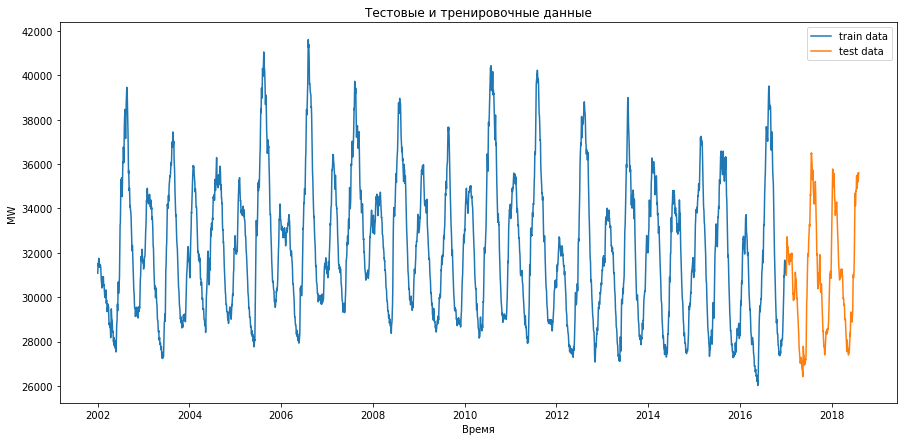

In [38]:
scl =StandardScaler()
scly =StandardScaler()
# сделаем примеры и модель 
def split_data_b( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()
train_b, test_b = split_data_b( df, '01-01-2017')

X_train_b = train_b.iloc[:-1,:]
y_train_b = train_b[df.columns[0]].values[1:]
X_test_b = test_b.iloc[:-1,:]
y_test_b = test_b[df.columns[0]].values[1:]


plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('MW')
plt.plot(train_b.index.get_level_values('Date'),train_b[df.columns[0]], label='train data' )
plt.plot(test_b.index.get_level_values('Date'),test_b[df.columns[0]], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

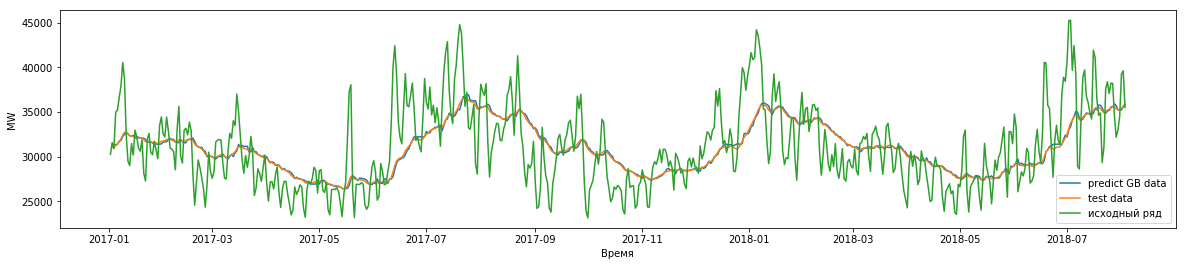

ошибка градиентного бустинга :   0.49971881056577727 %


In [44]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

model_gb = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)
model_gb.fit( X_train_b, y_train_b ) 
X_test_pred_gb = model_gb.predict(X_test_b)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('MW')
plt.plot(test_b.index[1:],X_test_pred_gb, label='predict GB data' )
plt.plot(test_b.index[1:],y_test_b, label='test data')
plt.plot(m_w.loc['2017-01-02':].index, m_w.loc['2017-01-02':]['PJME_MW'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

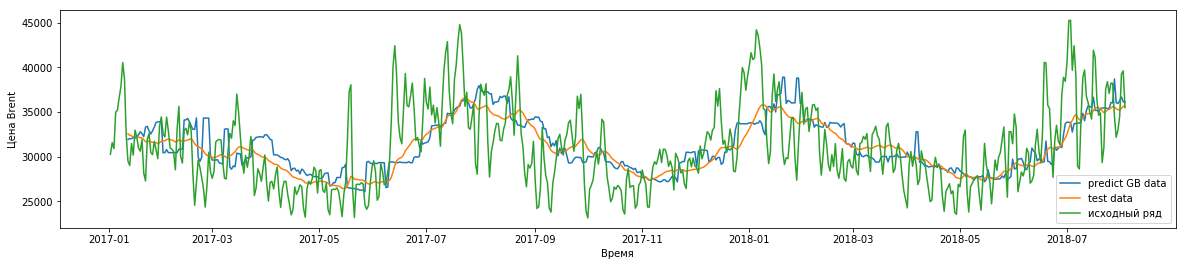

ошибка градиентного бустинга :   3.3120767286356587 %


In [45]:
h=10
X_train_b = train_b.iloc[:-h,:]
y_train_b = train_b[df.columns[0]].values[h:]
X_test_b = test_b.iloc[:-h,:]
y_test_b = test_b[df.columns[0]].values[h:]

model_gb.fit( X_train_b, y_train_b ) 
X_test_pred_gb = model_gb.predict(X_test_b)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('Цена Brent')
plt.plot(test_b.index[h:],X_test_pred_gb, label='predict GB data' )
plt.plot(test_b.index[h:],y_test_b, label='test data')
plt.plot(m_w.loc['2017-01-02':].index, m_w.loc['2017-01-02':]['PJME_MW'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

### 2. Оцените ошибку модели из п.2 .

#### h=1
- Ошибка градиентного бустинга :   0.49971881056577727 % для потребления энергии
- Ошибка градиентного бустинга :   0.4420925885712683 % для нефти
#### h=10
- Ошибка градиентного бустинга :   3.3120767286356587 % для потребления энергии
- Ошибка градиентного бустинга :   4.569012142938524 % для нефти
##### При h=1 разница по ошибке не большая, по h=10 ошибка для потребления энергии ниже чем для нефти

### 3 Сделайте вывод о том, как изменилась ошибка модели по значениям h.

Ошибка увеличалась до 3.3 %, что и следовало ожидать. Чем дальше будет прогноз тем ошибка больше. Если сравнить по прогнозам по нефти, то ошибка выросла не так высоко из-за того что это все таки стационарный процесс.

### 4. Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):

а) Изменение температуры за окном :).

Стационарный (мат ожидание постоянно), без тренда (в последнее время температура растет, но все таки навеное нет), с сезоном(годовой), с циклом(цикл-зависит от солнечной активности, а солнечная активность циклична)

б) Количество денег, которые тратят покупатели в интернет магазине.
Не стационарный (мат ожидание растет), с тренда (цены растут количество денег потраченных в интернете растет(инфляция)), с сезоном(праздники), с циклом(годовой)

в) Вес растущего котенка. 
Не стационарный (мат ожидание растет), с тренда (котенок растет вес увеличивается), без сезона, без цикла

г) Прирост объема деревьев в лесу от времени
Не стационарный (мат ожидание падает), с тренда (количество деревьев уменьшается), без сезона, без цикла